In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
SEED = 42

In [32]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-18 18:30:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv.5’

housing.csv.5       100%[===================>]   1,36M  4,95MB/s    in 0,3s    

2022-09-18 18:30:33 (4,95 MB/s) - ‘housing.csv.5’ saved [1423529/1423529]



In [33]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
target = 'median_house_value'

In [36]:
features = df.columns[df.columns != target].to_list()
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

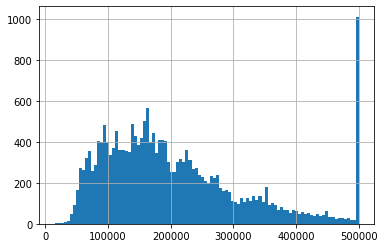

In [37]:
df[target].hist(bins=100);

In [38]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
base_features = df.columns.drop(['ocean_proximity', 'median_house_value']).to_list()
base_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [40]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [41]:
# Q1

df[features].isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [42]:
# Q2

df['population'].describe()['50%']

1166.0

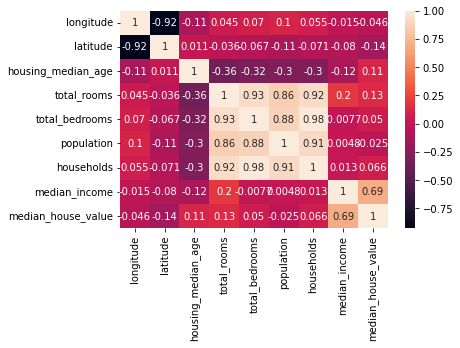

In [43]:
sns.heatmap(df.corr(), annot=True);

In [44]:
np.random.seed(SEED)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_train, n_val, n_test

(12384, 4128, 4128)

In [45]:
df_shuffled = df.sample(frac=1)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train[target].values
y_val_orig = df_val[target].values
y_test_orig = df_test[target].values

y_train = np.log1p(df_train[target].values)
y_val = np.log1p(df_val[target].values)
y_test = np.log1p(df_test[target].values)

del df_train[target]
del df_val[target]
del df_test[target]

In [46]:
def rmse(y, pred):
    return np.sqrt(((pred - y) ** 2).mean())

In [47]:
def train_linear_regression(X, y, r = 0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    if r:
        XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
# df_train.ocean_proximity.value_counts()

In [49]:
# ocean_proximity_unique = df_train.ocean_proximity.unique().tolist()

In [50]:
def prepare_X(df, features, filler=0):
    df = df.copy()
    features = features.copy()
    
#     for v in ocean_proximity_unique:
#         feature = 'ocean_proximity_%s' % v
#         df[feature] = (df['ocean_proximity'] == v).astype(int)
#         features.append(feature)
    
    df_num = df[features]
    print('isna qty', df_num.total_bedrooms.isna().sum())
    df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
#     print('filled', (df_num.total_bedrooms == filler).sum())
    X = df_num.values
    return X

In [51]:
# Q3
mean_total_bedrooms = df_train.total_bedrooms[~df_train.total_bedrooms.isna()].mean()
mean_total_bedrooms

533.4803317730147

In [52]:
# Q3 
# answer - both are equally good
for filler in [0, mean_total_bedrooms]:
    print(f'filler - {filler}')
    X_train = prepare_X(df_train, base_features, filler)
    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_train.dot(w)
    print('train:', round(rmse(y_train, y_pred), 2))

    X_val = prepare_X(df_val, base_features, filler)
    y_pred = w_0 + X_val.dot(w)
    print('validation:', round(rmse(y_val, y_pred), 2))
    print()

filler - 0
isna qty 207
train: 0.34
isna qty 0
validation: 0.33

filler - 533.4803317730147
isna qty 207
train: 0.34
isna qty 0
validation: 0.33



/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [53]:
# Q4

X_train = prepare_X(df_train, base_features)
X_val = prepare_X(df_val, base_features)
rmse_scores = dict()
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_scores[r] = rmse(y_val, y_pred)
    print('%6s' %r, rmse(y_val, y_pred))

isna qty 207
isna qty 0
     0 0.3295330365228625
 1e-06 0.32953303616512164
0.0001 0.3295330009708059
 0.001 0.3295327038673664
  0.01 0.3295319365994488
   0.1 0.32969472053972504
     1 0.33378872200060383
     5 0.3392485345505228
    10 0.3406063807809532


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)


In [54]:
sorted(rmse_scores.items(), key=lambda x: x[1])[0]

(0.01, 0.3295319365994488)

In [55]:
# Q5

rmse_scores = []

for s in range(10):
    print('SEED', s)
    np.random.seed(s)
    
    df_shuffled = df.sample(frac=1)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train[target].values
    y_val_orig = df_val[target].values
    y_test_orig = df_test[target].values

    y_train = np.log1p(df_train[target].values)
    y_val = np.log1p(df_val[target].values)
    y_test = np.log1p(df_test[target].values)

    del df_train[target]
    del df_val[target]
    del df_test[target]

    X_train = prepare_X(df_train, base_features)
    X_val = prepare_X(df_val, base_features)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    rmse_scores.append(rmse(y_val, y_pred))
    print('rmse', rmse(y_val, y_pred))

SEED 0
isna qty 128
isna qty 32
rmse 0.3388430480531184
SEED 1
isna qty 124
isna qty 44
rmse 0.33623872559561385
SEED 2
isna qty 122
isna qty 48
rmse 0.332091231884189
SEED 3
isna qty 123
isna qty 39
rmse 0.3405153609033391
SEED 4


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

isna qty 140
isna qty 32
rmse 0.33890240665724264
SEED 5
isna qty 129
isna qty 35
rmse 0.34348667257182797
SEED 6
isna qty 121


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

isna qty 43
rmse 0.34519809530992374
SEED 7
isna qty 125
isna qty 38
rmse 0.3395989927409946
SEED 8
isna qty 130


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

isna qty 36
rmse 0.34662308731840574
SEED 9
isna qty 120
isna qty 48
rmse 0.3365926124169337


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)


In [56]:
round(np.std(rmse_scores), 3)

0.004

In [57]:
# Q6
s = 9
print('SEED', s)
np.random.seed(s)

df_shuffled = df.sample(frac=1)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train[target].values
y_val_orig = df_val[target].values
y_test_orig = df_test[target].values

y_train = np.log1p(df_train[target].values)
y_val = np.log1p(df_val[target].values)
y_test = np.log1p(df_test[target].values)

del df_train[target]
del df_val[target]
del df_test[target]

X_train = prepare_X(df_train, base_features)
X_val = prepare_X(df_val, base_features)
X_test = prepare_X(df_test, base_features)

X_final_train = np.concatenate([X_train, X_val])
y_final_train = np.concatenate([y_train, y_val])

w_0, w = train_linear_regression(X_final_train, y_final_train, 0.001)
y_pred = w_0 + X_test.dot(w)

print('rmse', round(rmse(y_test, y_pred), 3))

SEED 9
isna qty 120
isna qty 48
isna qty 39
rmse 0.345


/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(filler)
/tmp/ipykernel_402345/1582945229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i